In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet
import plotly.express as px

In [2]:
#Criando uma tabela a partir de uma tabela de ações da empresa 'JNJ'
dados = pd.read_excel("/content/Tabela de Produção c.xlsx", sheet_name="tabel_sera")
dados = dados.reset_index()
dados

,index,Mês/Ano,LCD_0,Total acumulado_00,OLED_0,Total acumulado_01
0,0,2020-01-01,1113512,1113512,1066,1066
1,1,2020-02-01,1093056,2206568,1387,2453
2,2,2020-03-01,963254,3169822,2278,4731
3,3,2020-04-01,501775,3671597,403,5134
4,4,2020-05-01,970525,4642192,722,5856
5,5,2020-06-01,1008332,5650524,1306,7162
6,6,2020-07-01,1207173,6857697,3083,10245
7,7,2020-08-01,1241785,8099482,1892,12137
8,8,2020-09-01,1310610,9410092,2607,14744
9,9,2020-10-01,1659078,11069170,2829,17573


In [3]:
# Vamos dividir os dados de treino e de teste

dados_treino = dados[dados['Mês/Ano'] <= '2023-12-01']
dados_teste = dados[dados['Mês/Ano'] > '2023-12-01']

In [30]:
# Preparando os dados para o FBProphet
dados_prophet_treino = dados_treino[['Mês/Ano', 'LCD_0']].rename(columns={'Mês/Ano':'ds', 'LCD_0':'y'})
dados_prophet_treino

,ds,y
0,2020-01-01,1113512
1,2020-02-01,1093056
2,2020-03-01,963254
3,2020-04-01,501775
4,2020-05-01,970525
5,2020-06-01,1008332
6,2020-07-01,1207173
7,2020-08-01,1241785
8,2020-09-01,1310610
9,2020-10-01,1659078


In [38]:
# Criar e treinar o modelo

modelo = Prophet(weekly_seasonality=False,
         yearly_seasonality=True,
         daily_seasonality=False)
modelo = Prophet(changepoint_prior_scale=0.5, seasonality_prior_scale=0.1)
modelo.add_country_holidays(country_name='BR')

modelo.fit(dados_prophet_treino)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvflvirl9/hu191j20.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvflvirl9/d_pb4nw6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67622', 'data', 'file=/tmp/tmpvflvirl9/hu191j20.json', 'init=/tmp/tmpvflvirl9/d_pb4nw6.json', 'output', 'file=/tmp/tmpvflvirl9/prophet_modelt7s7jd5g/prophet_model-20240518174437.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:44:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:44:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [39]:
# Criar datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=24, freq='M')
previsao = modelo.predict(futuro)


In [7]:
#fig = modelo.plot(previsao)
#fig_comp = modelo.plot_components(previsao)

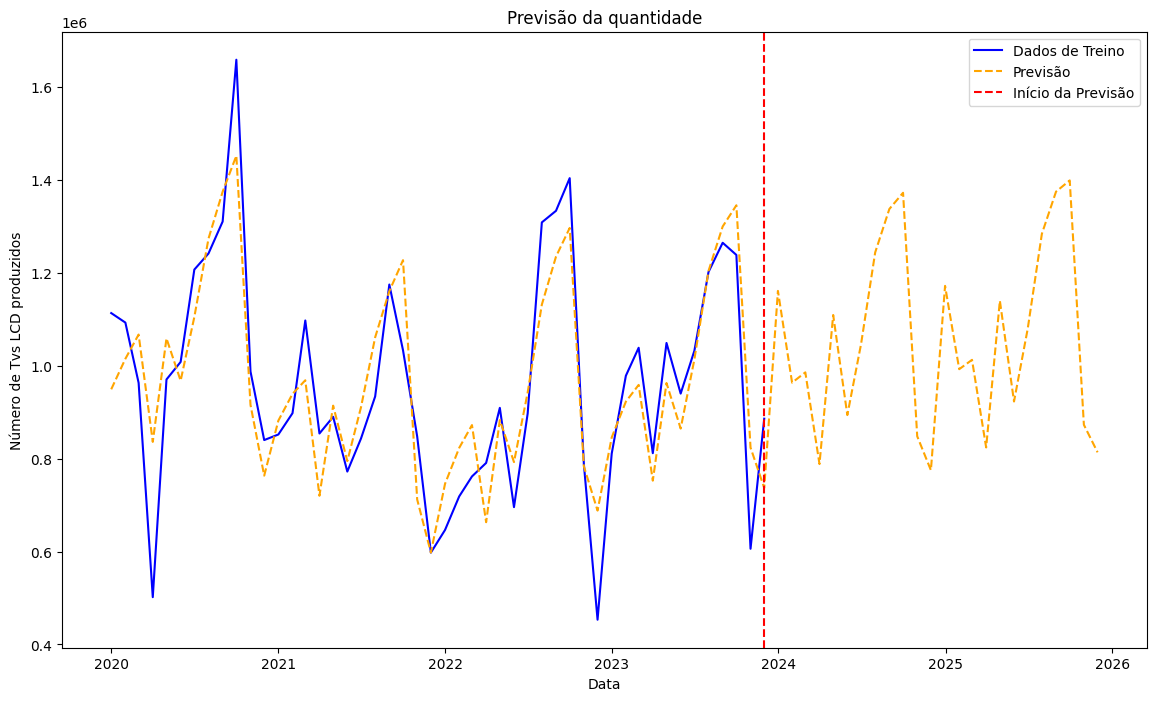

In [40]:
# Plotar os dados de treino, de teste e de previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Mês/Ano'], dados_treino['LCD_0'], label='Dados de Treino', color='blue')
#plt.plot(dados_teste['Mês/Ano'], dados_teste['LCD_0'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Mês/Ano'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Número de Tvs LCD produzidos')
plt.title('Previsão da quantidade')
plt.legend()
plt.show()

In [9]:
#Mostrando a tabela de vida útil
dados_1 = pd.read_excel('/content/Tabela de Produção c.xlsx', sheet_name='vida_util')
dados_1

,Vida_Útil (Anos),Aparelhos
0,8,Tv(LCD)
1,22,Tv(OLED)
2,10,Ar-condicionado


In [10]:
fig = px.bar(dados_1, x='Aparelhos', y='Vida_Útil (Anos)', text='Vida_Útil (Anos)', title='Vida Útil dos aparelhos')
fig.show()

In [11]:
dados_ac = pd.read_excel("/content/Tabela de Produção c.xlsx", sheet_name="tabel_ac")
dados_ac = dados_ac.reset_index()
dados_ac

,index,ANO,Produção,Saída SUFRAMA,Importação,Total Importação + Venda Nacional
0,0,2020-01-01,42612,36658,32119,68777
1,1,2020-02-01,38525,33281,9856,43137
2,2,2020-03-01,34150,38499,6450,44949
3,3,2020-04-01,22995,15867,4952,20819
4,4,2020-05-01,17849,21894,19,29913
5,5,2020-06-01,25133,19109,2981,22090
6,6,2020-07-01,36256,23994,508,24502
7,7,2020-08-01,47913,32503,0,16106
8,8,2020-09-01,46847,55984,624,56608
9,9,2020-10-01,60844,58407,4330,62737


In [12]:
# Vamos dividir os dados de treino e de teste

dados_treino_1= dados_ac[dados_ac['ANO'] <= '2023-12-01']
dados_teste_1 = dados_ac[dados_ac['ANO'] > '2023-12-01']

In [13]:
# Preparando os dados para o FBProphet
dados_prophet_treino_1 = dados_treino_1[['ANO', 'Produção']].rename(columns={'ANO':'ds', 'Produção':'y'})
dados_prophet_treino_1

,ds,y
0,2020-01-01,42612
1,2020-02-01,38525
2,2020-03-01,34150
3,2020-04-01,22995
4,2020-05-01,17849
5,2020-06-01,25133
6,2020-07-01,36256
7,2020-08-01,47913
8,2020-09-01,46847
9,2020-10-01,60844


In [42]:
# Criar e treinar o modelo

modelo = Prophet(weekly_seasonality=False,
         yearly_seasonality=True,
         daily_seasonality=False)
modelo = Prophet(changepoint_prior_scale=0.5, seasonality_prior_scale=0.1)
modelo.add_country_holidays(country_name='BR')

modelo.fit(dados_prophet_treino_1)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvflvirl9/sngv7e74.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvflvirl9/iura56wq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27747', 'data', 'file=/tmp/tmpvflvirl9/sngv7e74.json', 'init=/tmp/tmpvflvirl9/iura56wq.json', 'output', 'file=/tmp/tmpvflvirl9/prophet_model8njqrgdo/prophet_model-20240518174556.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:45:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:45:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [43]:
# Criar datas futuras para previsão até o final de 2023
futuro_1 = modelo.make_future_dataframe(periods=24, freq='M')
previsao_1 = modelo.predict(futuro_1)

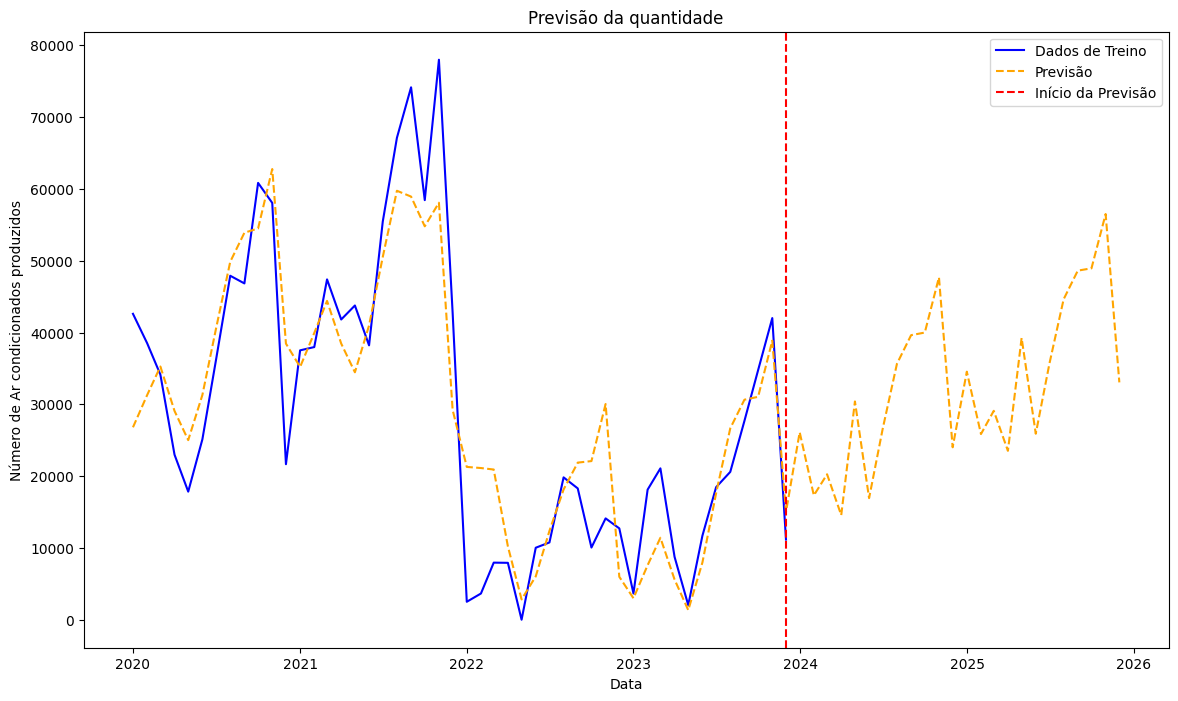

In [44]:
# Plotar os dados de treino, de teste e de previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino_1['ANO'], dados_treino_1['Produção'], label='Dados de Treino', color='blue')
#plt.plot(dados_teste['Mês/Ano'], dados_teste['LCD_0'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao_1['ds'], previsao_1['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino_1['ANO'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Número de Ar condicionados produzidos')
plt.title('Previsão da quantidade')
plt.legend()
plt.show()